<a href="https://colab.research.google.com/github/riqx-code/CARscan/blob/main/Task_1_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task-1 : Damage Identification

# Installations and Imports

In [99]:
from shapely.geometry import Polygon
import json 
import cv2 as cv
from google.colab.patches import cv2_imshow as imshow

# File loading : using ***Google Drive***

NOTE : In the folder ***'Data Visualization'*** there is no file name such as ***x-car-part.json*** and ***x.damage.json***.So I used folder ***'Damage Identification'*** folder given which have the above mentioned file.But those files dont contain information of Side of the car so by looking at images I returned them for bonus points.

In [100]:
# import Images using json file
f1 = open('/content/drive/MyDrive/jsons/1.json')
f2 = open('/content/drive/MyDrive/jsons/2.json')
f3 = open('/content/drive/MyDrive/jsons/3.json')
f4 = open('/content/drive/MyDrive/jsons/4.json')
f5 = open('/content/drive/MyDrive/jsons/5.json')
fd1 = open('/content/drive/MyDrive/jsons/1d.json')
fd2 = open('/content/drive/MyDrive/jsons/2d.json')
fd3 = open('/content/drive/MyDrive/jsons/3d.json')
fd4 = open('/content/drive/MyDrive/jsons/4d.json')
fd5 = open('/content/drive/MyDrive/jsons/5d.json')

In [101]:
# load images
d1 = json.load(f1)
d2 = json.load(f2)
d3 = json.load(f3)
d4 = json.load(f4)
d5 = json.load(f5)
dd1 = json.load(fd1)
dd2 = json.load(fd2)
dd3 = json.load(fd3)
dd4 = json.load(fd4)
dd5 = json.load(fd5)

## DATA ARRANGEMENT 



1.   **CPART** : It is list of car's list of ***points*** of ***parts***
2.   **CDPART** : It is list of car's list of ***damaged part points***
3.   **CNAME** : It is list of ***parts names*** and at last contains ***side of the vehicle***
4.   **DAMTYPE** : It contains names of type of damages corresponding to each car ,each damage specified



# CPART

In [102]:
# list of parts of all cars

# car part list 
cpart = []
# first car parts 
l = []
for i in range(len(d1)):
    l.append(d1[i]['value']['points'])
    if i == len(d1)-1:
      cpart.append(l)
      l=[]
# second car parts
l = []
for i in range(len(d2)):
    l.append(d2[i]['value']['points'])
    if i == len(d2)-1:
      cpart.append(l)
      l=[]
# third car parts
l = []
for i in range(len(d3)):
    l.append(d3[i]['value']['points'])
    if i == len(d3)-1:
      cpart.append(l)
      l=[]
# fourth car parts
l = []
for i in range(len(d4)):
    l.append(d4[i]['value']['points'])
    if i == len(d4)-1:
      cpart.append(l)
      l=[]
# fifth car part
l = []
for i in range(len(d5)):
    l.append(d5[i]['value']['points'])
    if i == len(d5)-1:
      cpart.append(l)
      l=[]

# CDPART

In [103]:
# list of damage area of all cars

# car part list 
cdpart = []
# first car damage area
l = []
for i in range(len(dd1)):
    l.append(dd1[i]['value']['points'])
    if i == len(dd1)-1:
      cdpart.append(l)
      l=[]
# second car damage area
l = []
for i in range(len(dd2)):
    l.append(dd2[i]['value']['points'])
    if i == len(dd2)-1:
      cdpart.append(l)
      l=[]
# third car damage area
l = []
for i in range(len(dd3)):
    l.append(dd3[i]['value']['points'])
    if i == len(dd3)-1:
      cdpart.append(l)
      l=[]
# fourth car damage area
l = []
for i in range(len(dd4)):
    l.append(dd4[i]['value']['points'])
    if i == len(dd4)-1:
      cdpart.append(l)
      l=[]
# fifth car damage area
l = []
for i in range(len(dd5)):
    l.append(dd5[i]['value']['points'])
    if i == len(dd5)-1:
      cdpart.append(l)
      l=[]

# CNAME

In [104]:
# list of parts  name of all cars

# car part name list 
cname = []
# first car parts area
l = []
for i in range(len(d1)):
    l.append(d1[i]['value']['polygonlabels'][0])
    if i == len(d1)-1:
      cname.append(l)
      l=[]
# second car parts area
l = []
for i in range(len(d2)):
    l.append(d2[i]['value']['polygonlabels'][0])
    if i == len(d2)-1:
      cname.append(l)
      l=[]
# third car parts area
l = []
for i in range(len(d3)):
    l.append(d3[i]['value']['polygonlabels'][0])
    if i == len(d3)-1:
      cname.append(l)
      l=[]
# fourth car parts area
l = []
for i in range(len(d4)):
    l.append(d4[i]['value']['polygonlabels'][0])
    if i == len(d4)-1:
      cname.append(l)
      l=[]
# fifth car part area
l = []
for i in range(len(d5)):
    l.append(d5[i]['value']['polygonlabels'][0])
    if i == len(d5)-1:
      cname.append(l)
      l=[]

# IMAGE LOAD

In [105]:
#now manually add side of the car by looking at image : for bonus task 

# image load

img1 = cv.imread('/content/drive/MyDrive/images/1.jpg')
img2 = cv.imread('/content/drive/MyDrive/images/2.jpg')
img3 = cv.imread('/content/drive/MyDrive/images/3.jpg')
img4 = cv.imread('/content/drive/MyDrive/images/4.jpg')
img5 = cv.imread('/content/drive/MyDrive/images/5.jpg')



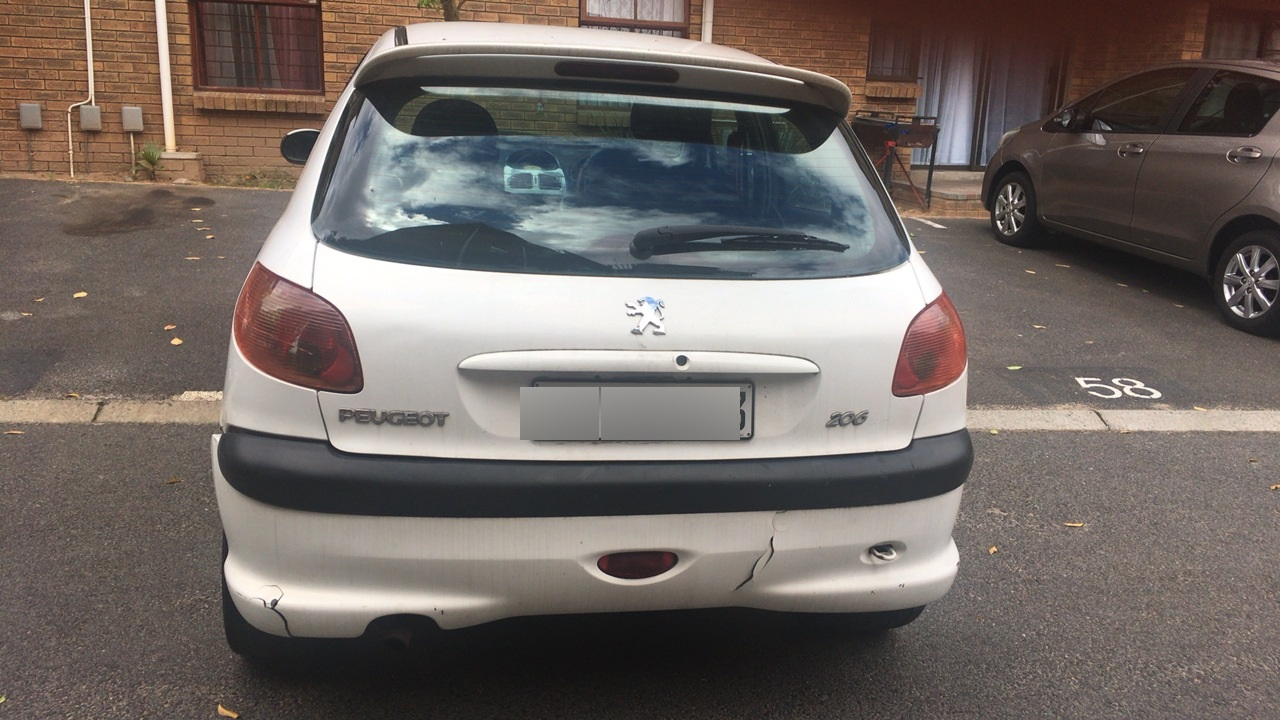

In [106]:
imshow(img1)

In [108]:
cname[0].append('backside')

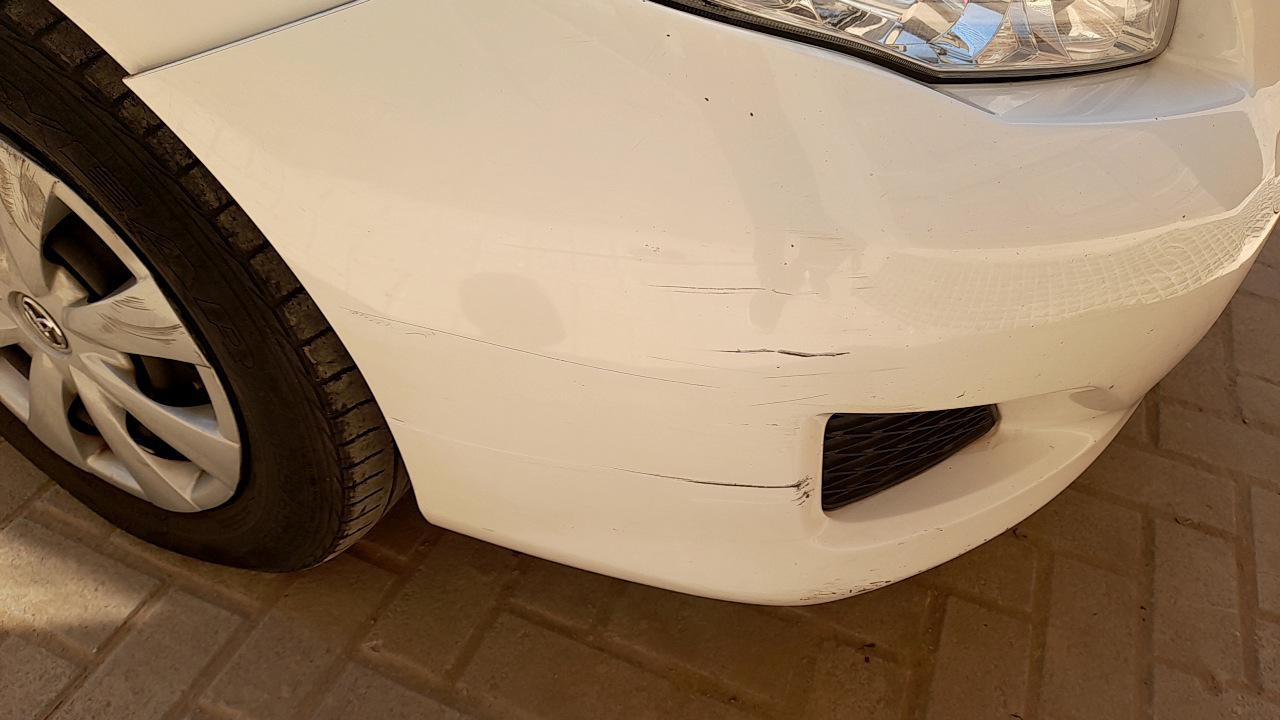

In [109]:
imshow(img3)

In [110]:
cname[2].append('drive-front-side')

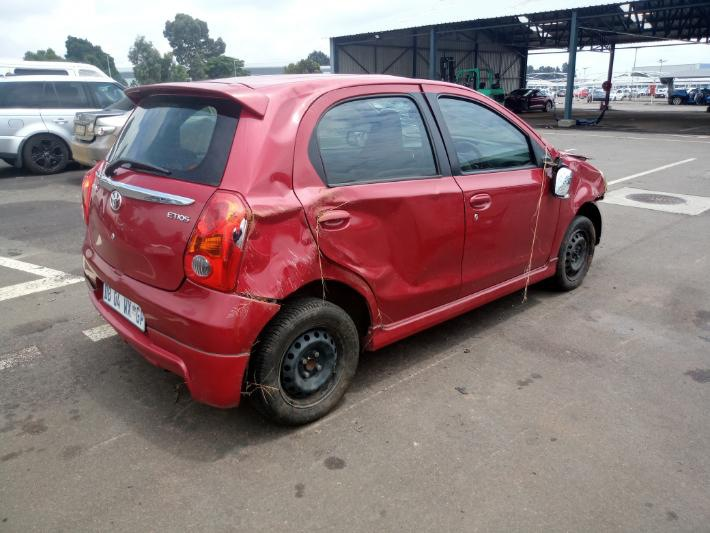

In [111]:
imshow(img4)

In [112]:
cname[3].append('driver-back-side')

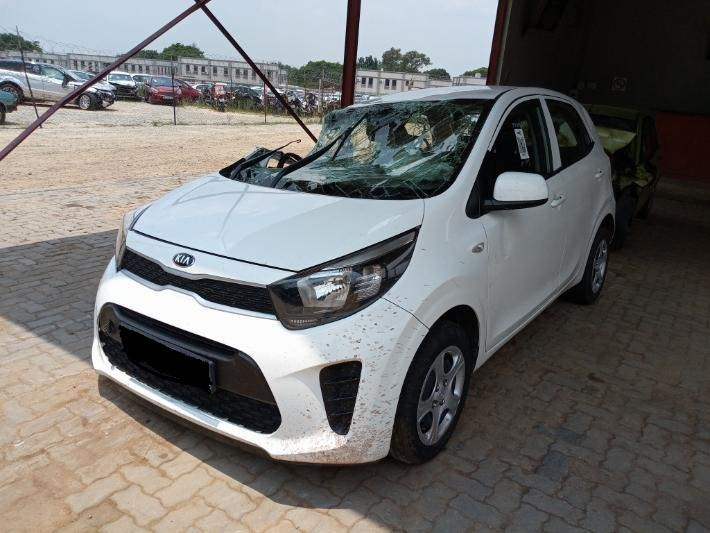

In [113]:
imshow(img5)

In [114]:
cname[4].append('passenger-front-side')

# DAMTYPE

In [115]:
# list of damage type of all cars

# car damage type list 
damtype = []
# first car damage type
l = []
for i in range(len(dd1)):
    l.append(dd1[i]['value']['polygonlabels'][0])
    if i == len(dd1)-1:
      damtype.append(l)
      l=[]
# second car damage type
l = []
for i in range(len(dd2)):
    l.append(dd2[i]['value']['polygonlabels'][0])
    if i == len(dd2)-1:
      damtype.append(l)
      l=[]
# third car damage type
l = []
for i in range(len(dd3)):
    l.append(dd3[i]['value']['polygonlabels'][0])
    if i == len(dd3)-1:
      damtype.append(l)
      l=[]
# fourth car damage type
l = []
for i in range(len(dd4)):
    l.append(dd4[i]['value']['polygonlabels'][0])
    if i == len(dd4)-1:
      damtype.append(l)
      l=[]
# fifth car damage type
l = []
for i in range(len(dd5)):
    l.append(dd5[i]['value']['polygonlabels'][0])
    if i == len(dd5)-1:
      damtype.append(l)
      l=[]

In [116]:
for i in damtype:
  print(i)

['Dent&Scratch(zoom)', 'Dent&Scratch(zoom)']
['Dent&Scratch', 'Dent&Scratch', 'Dent&Scratch']
['Dent&Scratch', 'Dent&Scratch', 'Dent&Scratch']
['Dent&Scratch']
['Broken']


# Damage Area calculation using overlapping 

In [117]:
def inter(l1,l2):
  p = Polygon(l1)
  q = Polygon(l2)
  return p.intersection(q).area

In [118]:
damageinfo = []

for i in range(5):
  l = []
  for j in range(len(cdpart[i])):
    for k in range(len(cpart[i])):
      x = inter(cpart[i][k],cdpart[i][j])
      if(x != 0):
        carpart_poly = Polygon(cpart[i][k])
        carpart_area = carpart_poly.area
        li = {}
        li['damage_area'] = x
        li['damage_area_percent'] = (x/carpart_area)*100
        li['damage_at'] = cname[i][k]
        li['damage_type'] = damtype[i][j]
        li['damage_position'] = cname[i][-1]
        l.append(li)
  
  l.append(len(l))
  damageinfo.append(l)

In [119]:
for i in damageinfo:
  print(i)

[{'damage_area': 27.39992318240925, 'damage_area_percent': 2.0693846126349302, 'damage_at': 'Bumper', 'damage_type': 'Dent&Scratch(zoom)', 'damage_position': 'backside'}, {'damage_area': 37.63563368055555, 'damage_area_percent': 2.842438670605734, 'damage_at': 'Bumper', 'damage_type': 'Dent&Scratch(zoom)', 'damage_position': 'backside'}, 2]
[{'damage_area': 5.807680028750534, 'damage_area_percent': 1.479655520553034, 'damage_at': 'Bumper', 'damage_type': 'Dent&Scratch', 'damage_position': 'Door'}, {'damage_area': 3.004953953908596, 'damage_area_percent': 2.2475880078904065, 'damage_at': 'Light', 'damage_type': 'Dent&Scratch', 'damage_position': 'Door'}, {'damage_area': 569.9466264509899, 'damage_area_percent': 24.62802443458822, 'damage_at': 'Fender', 'damage_type': 'Dent&Scratch', 'damage_position': 'Door'}, {'damage_area': 293.9875782953624, 'damage_area_percent': 26.997199857888777, 'damage_at': 'Door', 'damage_type': 'Dent&Scratch', 'damage_position': 'Door'}, {'damage_area': 4.071

# OUTPUT AND EXPORTING OUTPUT

In [120]:
# Data Printing

for i in range(len(damageinfo)):
  print(f"car number {i+1} ")
  l = damageinfo[i]
  for j in range(len(l)-1):
    print(f"In car-{i+1} , damage no :{j+1} , damage_area :   {l[j]['damage_area']} , damage_percent : {l[j]['damage_area_percent']}%  at  {l[j]['damage_position']+' '+l[j]['damage_at']}     of type    {l[j]['damage_type']} ")
  print('\n')

car number 1 
In car-1 , damage no :1 , damage_area :   27.39992318240925 , damage_percent : 2.0693846126349302%  at  backside Bumper     of type    Dent&Scratch(zoom) 
In car-1 , damage no :2 , damage_area :   37.63563368055555 , damage_percent : 2.842438670605734%  at  backside Bumper     of type    Dent&Scratch(zoom) 


car number 2 
In car-2 , damage no :1 , damage_area :   5.807680028750534 , damage_percent : 1.479655520553034%  at  Door Bumper     of type    Dent&Scratch 
In car-2 , damage no :2 , damage_area :   3.004953953908596 , damage_percent : 2.2475880078904065%  at  Door Light     of type    Dent&Scratch 
In car-2 , damage no :3 , damage_area :   569.9466264509899 , damage_percent : 24.62802443458822%  at  Door Fender     of type    Dent&Scratch 
In car-2 , damage no :4 , damage_area :   293.9875782953624 , damage_percent : 26.997199857888777%  at  Door Door     of type    Dent&Scratch 
In car-2 , damage no :5 , damage_area :   4.071958968729028 , damage_percent : 0.32811

In [98]:
with open('/content/drive/MyDrive/out_task_1/damageinfo.txt','w') as f:
  for ele in damageinfo :
    f.write(str(ele))
    f.write('\n')